In [355]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import random
import matplotlib.pyplot as plt

this PyTorch ANN Classification model predict chinese number characters. 
```
{
  0: "十",
  1: "一",
  2: "二",
  3: "三",
  4: "四",
  5: "五",
  6: "六",
  7: "七",
  8: "八",
  9: "九",
}
```


In [555]:
class MNIST_CH_Dataset(torch.utils.data.Dataset):
    def __init__(self,img_dir,images,transforms=None):
        self.img_dir = img_dir
        self.inputs = images
        self.transforms = transforms
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.inputs[idx])
        input = torchvision.io.read_image(img_path)
        if self.transforms:
            input = self.transforms(input)
        target =torch.tensor(int(self.inputs[idx].split('.')[-2][-1] ))
        return input,target

torch.Size([32, 32])


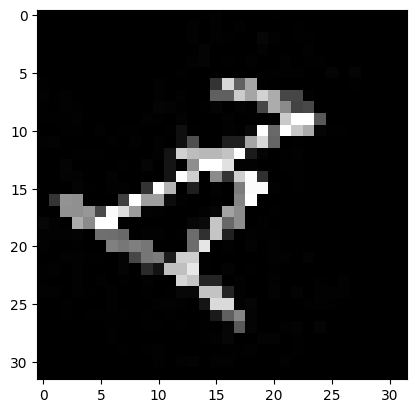

In [573]:
transform_train = transforms.Compose([
                                      transforms.RandomRotation(60),
                                      transforms.RandomCrop(32),
                                      # transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomAffine(0, translate=(0.1, 0.1)),
                                      transforms.ConvertImageDtype(dtype=torch.float32),
                                      ])

imagePath = os.path.join(os.getcwd()+"/MNIST-CH", "chinese_numbers_v3_0000s_0004_5.jpg")
torchvisionImage = torchvision.io.read_image(imagePath)
t_image = transform_train(torchvisionImage)

print(t_image[0].shape)
hisInput = torch.flatten(t_image)
np_image = hisInput.numpy()
# plt.hist(np_image)
plt.imshow(t_image[0],cmap='gray')

In [557]:
images = []
testImages =[]

totalImages = os.listdir( os.getcwd()+"/MNIST-CH")
 
for index in range(len(totalImages)):
    image = totalImages[index]
    if image.endswith(".jpg"):
        if index <= 100:
            images.append(image)
        else:
            testImages.append(image)

In [558]:
train_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=images, transforms=transform_train )
test_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=testImages, transforms=transform_train )
    
           
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)



In [559]:
model = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


In [562]:
n_epochs = 200
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_dataloader:
    inputs = inputs.view(-1, 1024)
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    
    test_loss = []
    
    for inputs, targets in test_dataloader:
        inputs = inputs.view(-1, 1024)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

  train_loss = np.mean(train_loss) # a little misleading
  train_losses[it] = train_loss
  test_losses[it] = test_loss
  if (it + 1) % 10 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
  if it == 0:
    print(inputs.shape)
    

torch.Size([10, 1024])
Epoch 10/200, Train Loss: 0.7148, Test Loss: 0.7564
Epoch 20/200, Train Loss: 0.7295, Test Loss: 0.8111
Epoch 30/200, Train Loss: 0.6633, Test Loss: 0.6401
Epoch 40/200, Train Loss: 0.6560, Test Loss: 0.9769
Epoch 50/200, Train Loss: 0.5064, Test Loss: 0.8195
Epoch 60/200, Train Loss: 0.4271, Test Loss: 0.8078
Epoch 70/200, Train Loss: 0.4859, Test Loss: 0.6415
Epoch 80/200, Train Loss: 0.4383, Test Loss: 0.5315
Epoch 90/200, Train Loss: 0.5341, Test Loss: 0.6527
Epoch 100/200, Train Loss: 0.5112, Test Loss: 0.7309
Epoch 110/200, Train Loss: 0.3555, Test Loss: 0.4596
Epoch 120/200, Train Loss: 0.3228, Test Loss: 0.9486
Epoch 130/200, Train Loss: 0.3783, Test Loss: 0.5536
Epoch 140/200, Train Loss: 0.3370, Test Loss: 0.5031
Epoch 150/200, Train Loss: 0.3374, Test Loss: 0.7214
Epoch 160/200, Train Loss: 0.3328, Test Loss: 0.4106
Epoch 170/200, Train Loss: 0.3343, Test Loss: 0.4769
Epoch 180/200, Train Loss: 0.2188, Test Loss: 0.7371
Epoch 190/200, Train Loss: 0.373

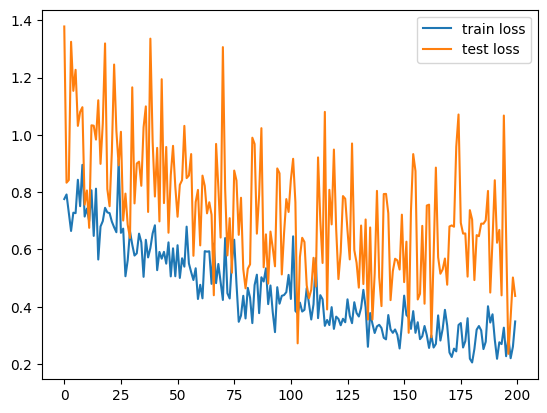

In [563]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [566]:
# accuracy
model.eval()

n_correct = 0.
n_total = 0.
for inputs, targets in train_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  # Get prediction
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9200, Test acc: 0.7500


Result: 8


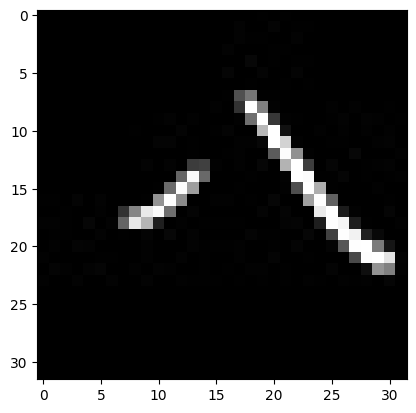

In [582]:
index = random.randrange(20)
test_image_path = os.path.join(os.getcwd()+"/MNIST-CH", testImages[index])

result_Image = torchvision.io.read_image(test_image_path)
result_input = transform_train(result_Image)    
result_input = result_input.view(-1, 1024)

output = model(result_input)

_, predictions = torch.max(output, 1)
result = predictions.item()

print(f"Result: {result}")
plt.imshow(result_Image[0],cmap='gray')
